### Apple Sales Data Wrangling
The objective of this notebook is to explore the sales data of Apple in 2024

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

In [3]:
# First, we read the data
df = pd.read_csv('/Users/andrew/Desktop/apple_sales_2024.csv')

# Lets look at the first 10 rows
df.head(10)

,State,Region,iPhone Sales (in million units),iPad Sales (in million units),Mac Sales (in million units),Wearables (in million units),Services Revenue (in billion $)
0,Chongqing,Greater China,7.46,6.75,1.19,5.88,15.88
1,Germany,Europe,8.63,14.06,7.03,7.42,10.12
2,UK,Europe,5.61,14.09,8.78,8.19,19.85
3,Shanghai,Greater China,7.82,7.97,9.78,2.28,6.16
4,Thailand,Rest of Asia,16.70,8.13,6.46,3.48,13.29
5,Chongqing,Greater China,12.18,10.97,9.38,11.65,12.70
6,UK,Europe,25.47,7.41,7.18,7.56,17.20
7,New York,North America,22.37,6.74,4.39,3.22,16.07
8,Mexico,Rest of World,20.80,6.79,4.99,2.68,8.69
9,Italy,Europe,9.06,9.14,8.99,2.66,6.01


What sort of data are we working with?

In [4]:
# Lets see what kind of data we are working with
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   State                            1000 non-null   object 
 1   Region                           1000 non-null   object 
 2   iPhone Sales (in million units)  1000 non-null   float64
 3   iPad Sales (in million units)    1000 non-null   float64
 4   Mac Sales (in million units)     1000 non-null   float64
 5   Wearables (in million units)     1000 non-null   float64
 6   Services Revenue (in billion $)  1000 non-null   float64
dtypes: float64(5), object(2)
memory usage: 54.8+ KB


What is the shape of our dataframe?

In [5]:
# Lets look at the shape of the data
df.shape

(1000, 7)

Are there any missing values we should be aware of?

In [6]:
# Lets see if there are any missing values
df.isnull().sum()

State                              0
Region                             0
iPhone Sales (in million units)    0
iPad Sales (in million units)      0
Mac Sales (in million units)       0
Wearables (in million units)       0
Services Revenue (in billion $)    0
dtype: int64

Looking at our data, we see that we have the sales of different products per state and region, and also the sales revenue for 2024. This makes me wonder, **does increased services revenue lead to increased units sold per city/state?**

In [7]:
# Lets make the columns easier to call on
newcolumns = ['State', 'Region', 'iPhone_sales', 'iPad_sales', 'Mac_sales', 'Wearable_sales', 'Services_Revenue']

df.columns = newcolumns

Are there any duplicate rows in the data?

In [8]:
# Check for duplicate rows
df.duplicated().sum()

0

In this case, since this is summarized data already, there is no need to check for outliers. Since there are no duplicates or missing values to investigate, we can start exploring the data. Its worth noting that all of the sales data is by million units, whereas the services revenue is measured in billions USD.

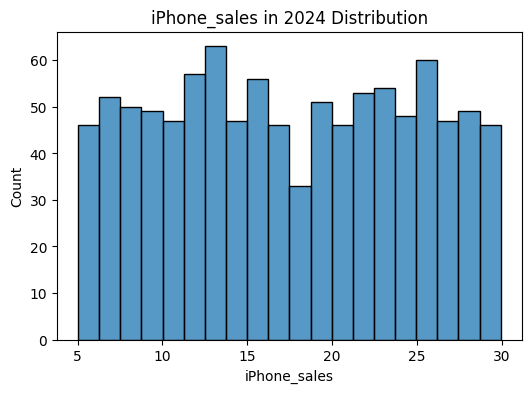

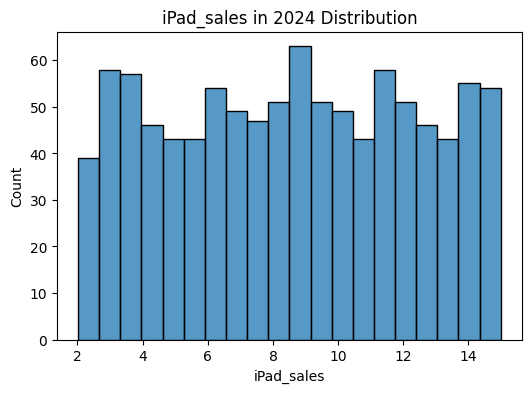

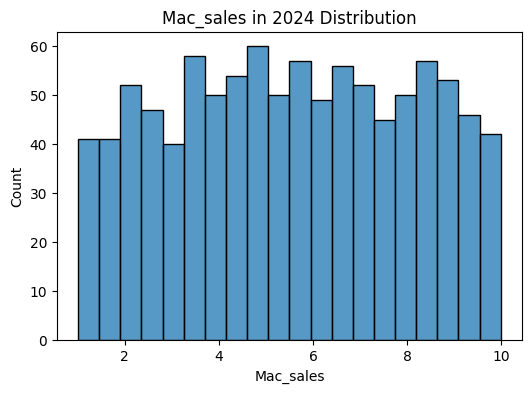

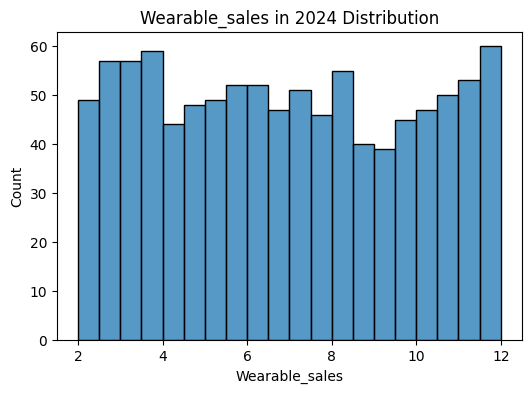

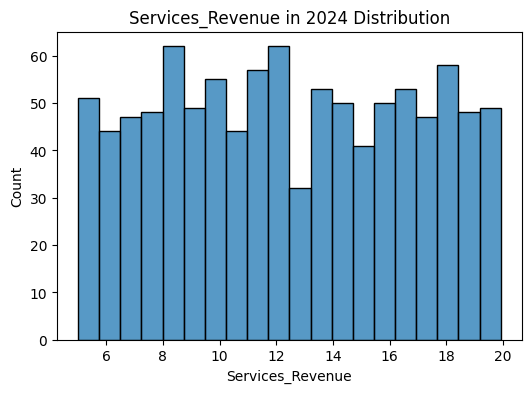

In [9]:
# First, lets look at the distribution of sales in each column

numeric_df = df.select_dtypes(include='number')

for column in numeric_df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df[column], bins=20)
    plt.title(f'{column} in 2024 Distribution')
    plt.show();

There doesnt seem to be a level of order to the data. Is the data normally distributed?

In [10]:
# The data does not seem to have a level of order to it..
# Test using shapiro-wilk test

for column in numeric_df.columns:
        stat, p_val = shapiro(df[column])
        print(f"Shapiro-Wilk Test P-value for {column}: {p_val}")
        if p_val > 0.05:
                print(f"{column} is normally distributed.")
        else:
                print(f"{column} is not normally distributed.")


Shapiro-Wilk Test P-value for iPhone_sales: 2.6856486245759104e-17
iPhone_sales is not normally distributed.
Shapiro-Wilk Test P-value for iPad_sales: 1.1940058346327815e-16
iPad_sales is not normally distributed.
Shapiro-Wilk Test P-value for Mac_sales: 2.0699422800563864e-15
Mac_sales is not normally distributed.
Shapiro-Wilk Test P-value for Wearable_sales: 4.030222606166438e-18
Wearable_sales is not normally distributed.
Shapiro-Wilk Test P-value for Services_Revenue: 5.962442559813638e-17
Services_Revenue is not normally distributed.


The data is not normally distributed across any column in the datset.

In [11]:
#Lets see what states had the highest iPhone sales in 2024
sorted_df = df.sort_values(by='iPhone_sales', ascending=False)
sorted_df.head(3)

,State,Region,iPhone_sales,iPad_sales,Mac_sales,Wearable_sales,Services_Revenue
743,Italy,Europe,29.94,14.17,1.40,9.29,5.27
866,Indonesia,Rest of Asia,29.92,2.07,5.05,2.68,8.50
34,Brazil,Rest of World,29.86,9.45,9.67,3.92,6.25


Italy had the highest number of iphones sold in 2024, with 29.94 million units. Indonesia was a close second, with Brazil third.

In [12]:
#Lets see what states had the highest iPad sales
sorted_df = df.sort_values(by='iPad_sales', ascending=False)
sorted_df.head(3)

,State,Region,iPhone_sales,iPad_sales,Mac_sales,Wearable_sales,Services_Revenue
841,Canada,Rest of World,25.48,14.99,4.38,5.75,19.14
760,Chongqing,Greater China,24.55,14.99,4.45,2.41,8.94
795,Shenzhen,Greater China,17.34,14.99,4.76,7.99,13.08


iPad sales in 2024 was a three way tie between Canada, Chongqing, and Shenzhen.

In [13]:
# What about iMacs?
sorted_df = df.sort_values(by='Mac_sales', ascending=False)
sorted_df.head(3)

,State,Region,iPhone_sales,iPad_sales,Mac_sales,Wearable_sales,Services_Revenue
347,South Korea,Rest of Asia,25.46,12.24,9.99,3.10,17.26
89,Chongqing,Greater China,22.70,7.95,9.98,9.73,15.48
104,Shanghai,Greater China,9.25,2.44,9.97,6.05,15.74


iMacs were sold the most in South Korea with close to a 10 million units sold in 2024, with chongqing and shanghai in second and third, respectively.

In [14]:
# and wearables?
sorted_df = df.sort_values(by='Wearable_sales', ascending=False)
sorted_df.head(3)

,State,Region,iPhone_sales,iPad_sales,Mac_sales,Wearable_sales,Services_Revenue
409,Texas,North America,25.12,2.84,6.93,12.00,13.02
163,Beijing,Greater China,13.45,6.05,8.29,11.99,11.45
893,Chongqing,Greater China,23.73,6.13,2.23,11.98,17.50


Texas sold the most wearables, with 12 million units in 2024, with beijing and Chongqing in second and third place in sales.

Greater Chinese cities seem to be appearing high in sales under alot of categories.. I wonder what state / city had the most total units sold?

In [15]:
# Calculate total units sold across product
df['Total_sales'] = df['Mac_sales'] + df['iPad_sales'] + df['iPhone_sales'] + df['Wearable_sales']

#Sort by total sales
sorted_df = df.sort_values(by='Total_sales', ascending=False)
sorted_df.head(3)

,State,Region,iPhone_sales,iPad_sales,Mac_sales,Wearable_sales,Services_Revenue,Total_sales
840,Hong Kong,Greater China,25.85,14.77,8.96,10.93,8.59,60.51
416,Mexico,Rest of World,29.53,10.31,7.85,11.47,12.62,59.16
963,Florida,North America,26.52,13.91,7.20,10.97,15.44,58.60


Hong kong had the highest sales, with 60.51 million sold across product lines in 2024. Mexico was second with 59.16 million, and Florida ranked third with 58.60 million.

In [16]:
# What state / city generated the most revenue from services offerings?
#Sort by services revenue
sorted_df = df.sort_values(by='Services_Revenue', ascending=False)
sorted_df.head(3)

,State,Region,iPhone_sales,iPad_sales,Mac_sales,Wearable_sales,Services_Revenue,Total_sales
235,Brazil,Rest of World,8.05,14.28,9.69,7.68,19.92,39.70
492,Beijing,Greater China,18.81,12.84,2.24,9.83,19.90,43.72
100,Japan,Rest of Asia,16.41,2.51,9.37,3.91,19.89,32.20


Brazil generated the most by services, with 19.92 billion dollars in revenue. Beijing and Japan were close, with 19.90 billion and 19.89 billion, respectively. I wonder what the average number of units sold was per state / city?

In [33]:
for column in numeric_df.columns:
    avg = df[column].mean()
    if column == 'Services_Revenue':
        print(f'The average {column} sales in billions for services offerings per State/City in 2024 was {avg:.2f} billion.')
    else:
        print(f"The average {column} per State/City in 2024 was {avg:.2f} million units sold.")

The average iPhone_sales per State/City in 2024 was 17.44 million units sold.
The average iPad_sales per State/City in 2024 was 8.57 million units sold.
The average Mac_sales per State/City in 2024 was 5.56 million units sold.
The average Wearable_sales per State/City in 2024 was 6.94 million units sold.
The average Services_Revenue sales in billions for services offerings per State/City in 2024 was 12.45 billion.


 Now that we explored the top states, lets explore the data by region.

In [17]:
# First, lets aggregate the dataframe on the region column, and drop the state column.

region_df = df.drop(columns='State').groupby('Region').sum()

region_df

,iPhone_sales,iPad_sales,Mac_sales,Wearable_sales,Services_Revenue,Total_sales
Region,,,,,,
Europe,3563.12,1745.66,1111.22,1353.12,2416.30,7773.12
Greater China,3868.28,1862.95,1212.80,1514.86,2780.72,8458.89
North America,3124.14,1625.44,1028.96,1272.92,2281.21,7051.46
Rest of Asia,3091.50,1473.26,982.94,1296.29,2267.15,6843.99
Rest of World,3797.46,1858.57,1219.84,1498.31,2701.75,8374.18


Having only 5 regions, we can draw conclusions pretty easily from the dataframe now. It seems that the Greater China region had the highest units sold in every category besides iMacs, with the rest of world claiming first place. I wonder how much of the total sales went to the Greater China region?

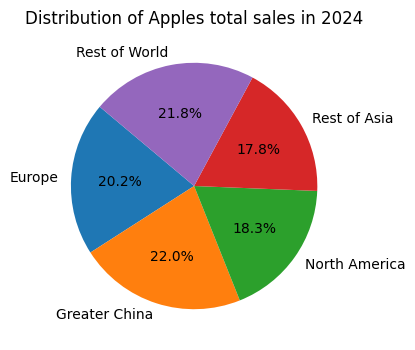

In [26]:
# First lets calculate percent of sales
total_sales = region_df['Total_sales'].sum()

# now calculate the percentage of sales per region
region_df['%_of_sales'] = region_df['Total_sales'] / total_sales * 100

# lets visualize the results
plt.figure(figsize=(6,4))
plt.pie(region_df['%_of_sales'], labels=region_df.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Apples total sales in 2024');

It seems that every region plays its role in units sold, with sales distributed almost equally across the world.

Now that we explored the data a bit, and calculated the total units sold per state, lets go back to our question: Does increased services revenue lead to an increase in product sales? Lets look at a visual representation first.

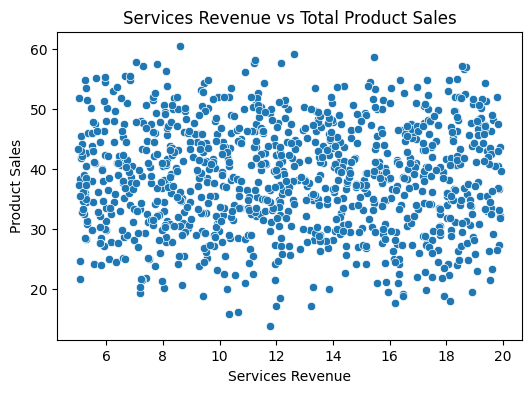

In [44]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Services_Revenue', y='Total_sales', data=df)
plt.title('Services Revenue vs Total Product Sales')
plt.xlabel('Services Revenue')
plt.ylabel('Product Sales')
plt.show()

There seems to be no correlation here, but to be sure, lets calculate the correlation coefficient between the total sales and services revenue columns.

In [43]:
df[['Total_sales', 'Services_Revenue']].corr()

,Total_sales,Services_Revenue
Total_sales,1.000000,-0.001904
Services_Revenue,-0.001904,1.000000


The correlation coefficient is close to 0, meaning that there is no correlation between the services revenue, and total product sales.

### Summary

* After initial investigation of the data, we found that there were no missing values, and no duplicates.
* based on our columns, we came up with the the null Hypothesis: **An increase in sales revenue does not lead to an increase in product sales**
* We explored the data, identifying the cities and regions with the highest sales in millions of units per product, and also calculated the average number of units sold per city in 2024.
* We found that our data is not normally distributed across any column.
* We calculated the total number of units sold across products, which was then used in correlation against the sales revenue to determine if there was a link between the two.
* With a correlation coefficient of -0.001, we can accept our null hypothesis, that an increase in sales revenue does not lead to an increase in product sales.